# <span style="color:#0099cc">Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands<br/>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# <span style="color:#0099cc">Data Understanding and Preparation

In [1]:
# importing the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
# Reading the day.csv
boomBikes = pd.read_csv('day.csv')

In [3]:
# To display the first 5 observations of the data set
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boomBikes.shape

(730, 16)

In [5]:
boomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### <span style="color:#0099cc">Converting the date column into datetime format

In [6]:
boomBikes['dteday'] = boomBikes[['dteday']].apply(pd.to_datetime)

In [7]:
for i in boomBikes.columns:
    print("=========================")
    print(boomBikes[i].value_counts())
    print("")

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64

2019-10-25    1
2019-12-22    1
2019-03-08    1
2018-01-15    1
2018-03-18    1
             ..
2018-08-04    1
2018-10-05    1
2019-11-11    1
2019-02-12    1
2018-12-21    1
Name: dteday, Length: 730, dtype: int64

3    188
2    184
1    180
4    178
Name: season, dtype: int64

1    365
0    365
Name: yr, dtype: int64

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

0    709
1     21
Name: holiday, dtype: int64

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

1    504
0    226
Name: workingday, dtype: int64

1    463
2    246
3     21
Name: weathersit, dtype: int64

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.52

In [8]:
boomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <span style="color:#0099cc">Mapping the Categorical values : From numeric

In [9]:
# Mapping the Season variable
boomBikes['season'] = boomBikes[['season']].apply(lambda x: x.map({1:'spring', 2: 'summer', 3:'fall', 4:'winter'}))

In [10]:
# Mapping the mnth variable with function month_map
def month_map(x):
    return x.map({
        1:'January',
        2: 'February',
        3: 'March',
        4:'April',
        5: 'May',
        6:'June',
        7:'July',
        8:'August',
        9:'September',
        10:'October',
        11:'November',
        12 : 'December'})
boomBikes['mnth'] = boomBikes[['mnth']].apply(month_map)

In [11]:
# Mapping the weekday variable with function weekday_map
def weekday_map(x):
    return x.map({
        0:'Sunday',
        1:'Monday',
        2:'Tuesday',
        3:'Wednesday',
        4:'Thursday',
        5:'Friday',
        6:'Saturday'
    })
boomBikes['weekday'] = boomBikes[['weekday']].apply(weekday_map)

In [12]:
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Mapping the weathersit variable with function weathersit_map
def weathersit_map(x):
      return x.map({
        1:'Clear',
        2:'Mist',
        3:'Light Snow',
        4:'Heavy Rain'
    })
boomBikes['weathersit'] = boomBikes[['weathersit']].apply(weathersit_map)

### <span style="color:#0099cc"> Value counts after the variables are converted into categorical 

In [14]:
print("----------- Value counts after the variables are converted into categorical------------\n")
for i in boomBikes.columns:
    print(boomBikes[i].value_counts())
    print("________________________________________________________________________________________")
    print("")

----------- Value counts after the variables are converted into categorical------------

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
________________________________________________________________________________________

2019-10-25    1
2019-12-22    1
2019-03-08    1
2018-01-15    1
2018-03-18    1
             ..
2018-08-04    1
2018-10-05    1
2019-11-11    1
2019-02-12    1
2018-12-21    1
Name: dteday, Length: 730, dtype: int64
________________________________________________________________________________________

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
________________________________________________________________________________________

1    365
0    365
Name: yr, dtype: int64
________________________________________________________________________________________

January      62
July         62
October      62
March        62
Decembe

# <span style="color:#0099cc">Data Visulisation

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables

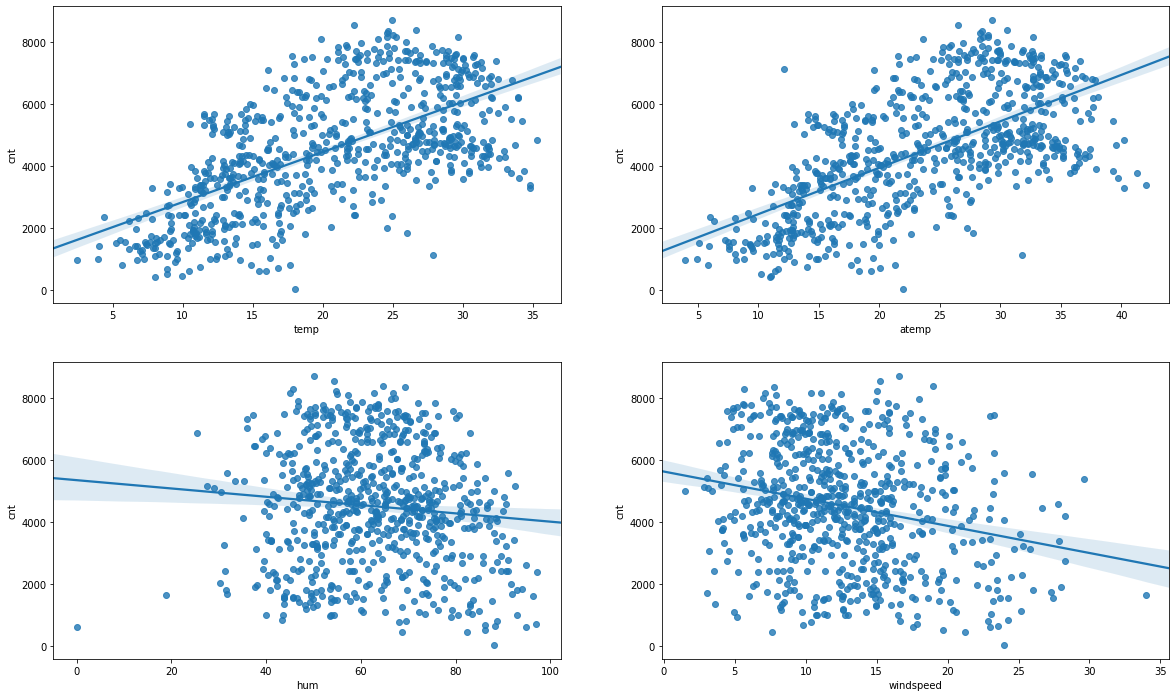

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.regplot(x = 'temp', y = 'cnt', data = boomBikes)
plt.subplot(2,2,2)
sns.regplot(x = 'atemp', y = 'cnt', data = boomBikes)
plt.subplot(2,2,3)
sns.regplot(x = 'hum', y = 'cnt', data = boomBikes)
plt.subplot(2,2,4)
sns.regplot(x = 'windspeed', y = 'cnt', data = boomBikes)
plt.show()

### Visualising Categorical Variables

In [17]:
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


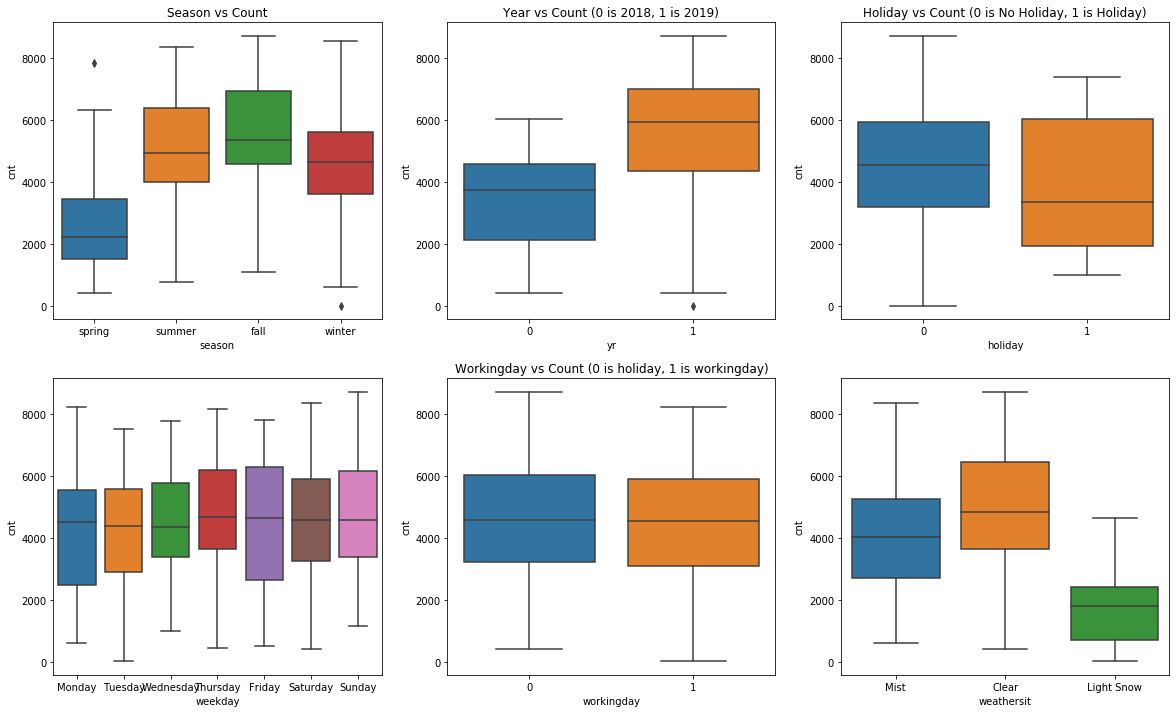

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boomBikes)
plt.title('Season vs Count')
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boomBikes)
plt.title('Year vs Count (0 is 2018, 1 is 2019)')
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = boomBikes)
plt.title('Holiday vs Count (0 is No Holiday, 1 is Holiday)')
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boomBikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = boomBikes)
plt.title('Workingday vs Count (0 is holiday, 1 is workingday)')
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boomBikes)
plt.show()

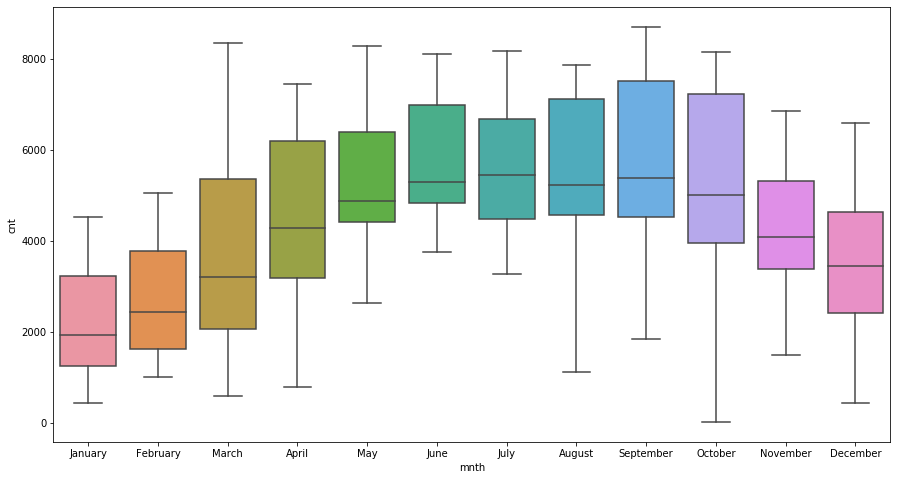

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='mnth',y='cnt',data=boomBikes)
plt.show()

## Multivariate Analysis for the continuous variables

In [20]:
boomBikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

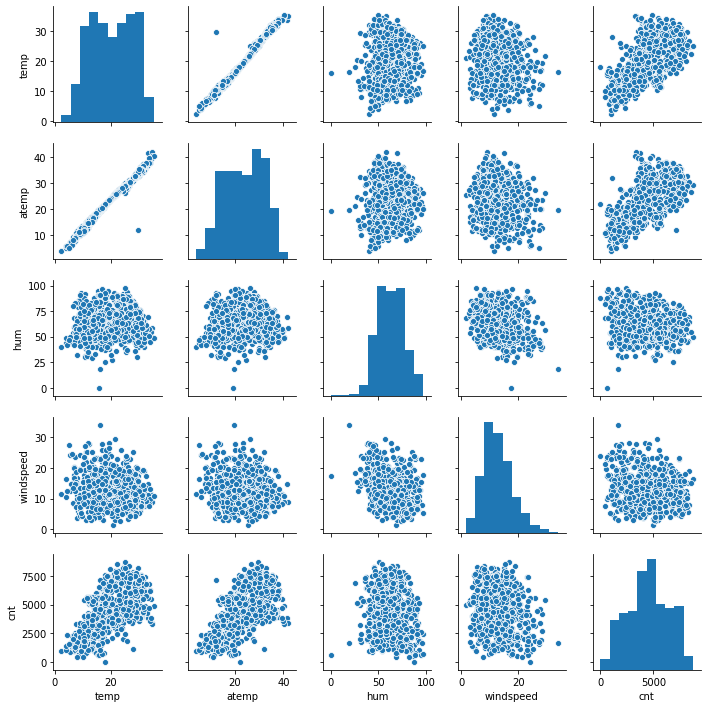

In [21]:
sns.pairplot(boomBikes, x_vars=['temp', 'atemp', 'hum', 'windspeed','cnt'], 
             y_vars=['temp', 'atemp', 'hum', 'windspeed','cnt'],
             size=2, aspect=1, kind='scatter')
plt.show()

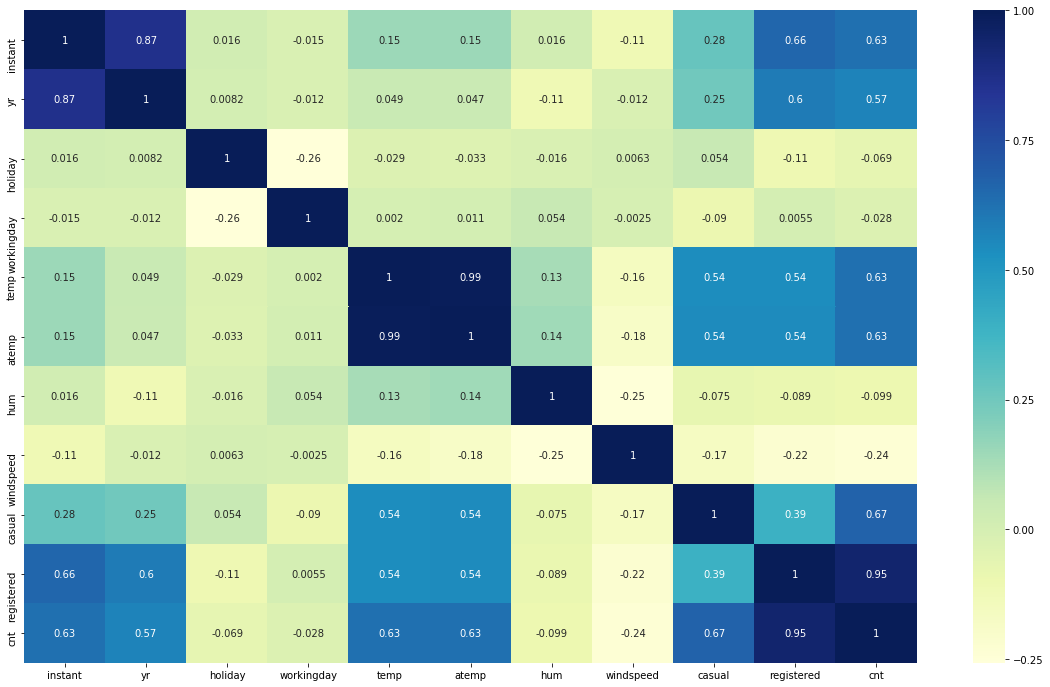

In [22]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(boomBikes.corr(), annot=True,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

From the heatmap we can infer that, there is a strong correlation between the variables:
   * `instant` and `yr`, 
   * `temp` and `atemp`, 
   * `cnt` and `registered`


Since the varaibles `temp` and `atemp` are highly correlated with co-efficienct of 0.99, hence both varibles will explain the target variable `cnt` in a similar way, thus we can drop either one of them. Let's drop `atemp`. 

In [23]:
boomBikes.drop(['atemp'], axis = 1, inplace = True)

# <span style="color:#0099cc"> Data Preparation

In [24]:
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [25]:
boomBikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

- From the data set , it is clear that `season`,`mnth`,`weekday` and `weathersit` columns contains categorical values.
- In order to fit regression line, it is required to encode these categorical values to numercial.

In [26]:
# Encoding the dummy variables

encoded_boomBikes = pd.get_dummies(boomBikes[['season','mnth','weekday','weathersit']], drop_first=True)


In [27]:
encoded_boomBikes.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Add the encoded variables to the original boombikes dataframe

boomBikes = pd.concat([boomBikes, encoded_boomBikes], axis = 1)

In [29]:
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,1,2018-01-01,spring,0,January,0,Monday,1,Mist,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,spring,0,January,0,Tuesday,1,Mist,14.902598,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,spring,0,January,0,Wednesday,1,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,spring,0,January,0,Thursday,1,Clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,spring,0,January,0,Friday,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Drop the columns 'season','mnth','weekday','weathersit', as the dummies are created for it

boomBikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
boomBikes.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


Dropping the columns `instant` and `dteday`,  which are not informative for the linear regression model.

In [32]:
boomBikes.drop(['instant','dteday'],axis=1, inplace=True)

Since the target variable `cnt` is a sum of the variables `casual` and `registered` respectively, it is required to drop these variables from the data set,as the model will be able to learn the target variable only through these 2 variables.

In [33]:
boomBikes.drop(['casual','registered'],axis=1, inplace=True)

In [34]:
boomBikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# <span style="color:#0099cc"> Splitting the data into Training and Testing Sets

Dividing the preprocessed data into Training and Testing sets in the ratio of 70:30 respectively.

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(boomBikes, train_size = 0.7, test_size = 0.3, random_state = 99)

In [37]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
435,1,0,1,19.133347,48.9167,13.916771,5298,1,0,0,...,0,0,0,0,0,0,1,0,0,0
373,1,0,1,9.190847,70.1667,6.626300,2376,1,0,0,...,0,0,0,0,0,0,0,1,0,1
673,1,0,1,13.085847,49.4167,15.833775,5259,0,0,1,...,0,0,0,0,0,0,1,0,0,0
206,0,0,1,31.638347,54.0833,13.417286,4590,0,0,0,...,0,0,0,0,0,1,0,0,0,0
103,0,0,0,19.167500,54.0417,7.416900,3267,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Rescaling the Features 

For easy interpretation and optimisation of the model, the numerical variables in the data set which have unique values other than 0 and 1 are scaled using **Min-Max Scaling**.

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the 'dummy' variables and columns with unique values of 0 and 1.

num_vars = ['temp','hum','windspeed']

# fit_transform is used to learn the min-max in the data set and then transform
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
435,1,0,1,0.507811,0.502999,0.442114,5298,1,0,0,...,0,0,0,0,0,0,1,0,0,0
373,1,0,1,0.205644,0.721508,0.182523,2376,1,0,0,...,0,0,0,0,0,0,0,1,0,1
673,1,0,1,0.324018,0.508141,0.510372,5259,0,0,1,...,0,0,0,0,0,0,1,0,0,0
206,0,0,1,0.887856,0.556126,0.424328,4590,0,0,0,...,0,0,0,0,0,1,0,0,0,0
103,0,0,0,0.508849,0.555699,0.210674,3267,0,1,0,...,0,0,0,1,0,0,0,0,0,0


To confirm the data are scaled, `describe` method is used. From the output it is inferred that the maximum value is 1 and minimum value is 0.

In [42]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.492157,0.027451,0.694118,0.546991,0.641949,0.390194,4535.84902,0.247059,0.241176,0.24902,...,0.080392,0.078431,0.137255,0.152941,0.131373,0.160784,0.131373,0.133333,0.027451,0.313725
std,0.500429,0.163554,0.461233,0.227566,0.143111,0.187136,1917.75692,0.431725,0.428217,0.43287,...,0.272166,0.269113,0.344454,0.360284,0.338139,0.367693,0.338139,0.340268,0.163554,0.464462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,506.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352054,0.538453,0.259632,3129.75000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544672,0.637318,0.360523,4543.50000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.744300,0.743168,0.496642,6019.75000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8555.00000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X (independent variables) and Y (dependent varaible) sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
X_train.shape

(510, 28)

## <span style="color:#0099cc"> Building the Linear Regression model using RFE (Recursive Feature Elimination)

Since the data set as 28 columns we cannot follow the manual approach to select the variables. Hence we need to select the mixed approach, where intially 15 variables are selected and then based on the p-value and VIF values the variables are dropped.

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Fit the linear regression model on the trained data set
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the 15 variables
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

RFE provides `rfe.support_` which will give the information about the variables, whether it is selected or not. The Rank 1 is given for the variables that are selected.

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_August', False, 12),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 10),
 ('mnth_May', False, 8),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 2),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

Among the 28 columns , using the RFE method, the top 15 variables are selected.

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

Building model using `statsmodel`, for the detailed statistics. The statsmodels is used on the 15 selected variables

In [49]:
# Creating a new X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [50]:
# Adding a constant variable as by default statsmodel will not add the intercept
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_December,mnth_February,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light Snow,weathersit_Mist
435,1.0,1,0,0.507811,0.502999,0.442114,1,0,0,0,0,0,0,0,0,0
373,1.0,1,0,0.205644,0.721508,0.182523,1,0,0,0,1,0,0,0,0,1
673,1.0,1,0,0.324018,0.508141,0.510372,0,1,0,0,0,0,1,0,0,0
206,1.0,0,0,0.887856,0.556126,0.424328,0,0,0,0,0,1,0,0,0,0
103,1.0,0,0,0.508849,0.555699,0.210674,0,0,0,0,0,0,0,0,0,0


In [52]:
#Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [53]:
# Checking the summary of the linear regression model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          1.15e-198
Time:                        02:04:22   Log-Likelihood:                -4079.4
No. Observations:                 510   AIC:                             8191.
Df Residuals:                     494   BIC:                             8259.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3498.81

In [54]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [55]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.78
2,temp,18.19
4,windspeed,4.78
5,season_spring,4.15
6,season_winter,3.03
9,mnth_January,2.23
14,weathersit_Mist,2.15
8,mnth_February,2.05
0,yr,2.02
11,mnth_November,1.96


From the above output, it is clear that the 2 variables have a p-value > 0.05
* the variable `mnth_February` is insignificant with a p-value of 0.054.
* the variable `hum`  as a high VIF value of 24.78 (>5)
* Similarly the variable `temp` as a VIF of 18.19 (>5) which means that these 2 variables are correlated with other independent variables.

Lets drop the `mnth_February` variable as it may change the VIF of other variables.

In [56]:
X_train_new = X_train_rfe.drop(['mnth_February'], axis = 1)

In [57]:
X_train_new.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light Snow,weathersit_Mist
435,1,0,0.507811,0.502999,0.442114,1,0,0,0,0,0,0,0,0
373,1,0,0.205644,0.721508,0.182523,1,0,0,1,0,0,0,0,1
673,1,0,0.324018,0.508141,0.510372,0,1,0,0,0,1,0,0,0
206,0,0,0.887856,0.556126,0.424328,0,0,0,0,1,0,0,0,0
103,0,0,0.508849,0.555699,0.210674,0,0,0,0,0,0,0,0,0


### Rebuilding the model without `mnth_February`

In [58]:
# Adding a constant variable for the new dataframe
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_new)

In [59]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm_1).fit()   

In [60]:
#The summary of the linear regression model without atemp
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     212.8
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          4.93e-199
Time:                        02:04:22   Log-Likelihood:                -4081.3
No. Observations:                 510   AIC:                             8193.
Df Residuals:                     495   BIC:                             8256.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3418.39

In [61]:
X_train_lm_1 = X_train_lm_1.drop(['const'], axis=1)

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.13
2,temp,17.51
4,windspeed,4.77
6,season_winter,3.02
5,season_spring,2.93
13,weathersit_Mist,2.14
0,yr,2.02
10,mnth_November,1.93
8,mnth_January,1.62
7,mnth_December,1.58


### The adjusted R-squared value is same, which implies that the variable `mnth_February` was insignificant.
Though the variable `mnth_January ` as a low VIF ,it's insignificant with a p-value of 0.010. Hence drop the variable and rebuild the model.

# <span style="color:#0099cc">Dropping `mnth_January`

In [63]:
X_train_new = X_train_new.drop(['mnth_January'], axis = 1)

In [64]:
X_train_new.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_December,mnth_July,mnth_November,mnth_September,weathersit_Light Snow,weathersit_Mist
435,1,0,0.507811,0.502999,0.442114,1,0,0,0,0,0,0,0
373,1,0,0.205644,0.721508,0.182523,1,0,0,0,0,0,0,1
673,1,0,0.324018,0.508141,0.510372,0,1,0,0,1,0,0,0
206,0,0,0.887856,0.556126,0.424328,0,0,0,1,0,0,0,0
103,0,0,0.508849,0.555699,0.210674,0,0,0,0,0,0,0,0


In [65]:
# Adding the constanst for the updated data frame
X_train_lm_2 = sm.add_constant(X_train_new)

In [66]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm_2).fit()   

In [67]:
#The summary of the linear regression model without atemp,mnth_December
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          8.41e-199
Time:                        02:04:22   Log-Likelihood:                -4084.7
No. Observations:                 510   AIC:                             8197.
Df Residuals:                     496   BIC:                             8257.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3345.61

In [68]:
X_train_lm_2 = X_train_lm_2.drop(['const'], axis=1)

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.98
2,temp,16.53
4,windspeed,4.76
6,season_winter,3.02
5,season_spring,2.66
12,weathersit_Mist,2.12
0,yr,2.01
9,mnth_November,1.91
7,mnth_December,1.51
8,mnth_July,1.49


The adjusted R-squared value and R-squared value remains same, even after dropping the variable `mnth_January`, hence the variable dropped is insignificant.

* From the summary, all the variables are significant with p-value less than **0.05**. 
* From the Variance Inflation Factor (VIF) 
    - The variable `temp` as a VIF of 16.53 (>5)
    - The variable `hum` as highest VIF of 22.98 which is greater than 5 i.e more than 80% of varaince of this varaibles is explained from other independent varaiables. Thus let's drop `hum` first.
    

# <span style="color:#0099cc">Dropping `hum`

In [70]:
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [71]:
X_train_new.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_December,mnth_July,mnth_November,mnth_September,weathersit_Light Snow,weathersit_Mist
435,1,0,0.507811,0.442114,1,0,0,0,0,0,0,0
373,1,0,0.205644,0.182523,1,0,0,0,0,0,0,1
673,1,0,0.324018,0.510372,0,1,0,0,1,0,0,0
206,0,0,0.887856,0.424328,0,0,0,1,0,0,0,0
103,0,0,0.508849,0.210674,0,0,0,0,0,0,0,0


In [72]:
# Adding constant
X_train_lm_3 = sm.add_constant(X_train_new)

In [73]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm_3).fit()   

In [74]:
#The summary of the linear regression model without atemp,mnth_December and temp
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     231.9
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          8.23e-195
Time:                        02:04:22   Log-Likelihood:                -4097.0
No. Observations:                 510   AIC:                             8220.
Df Residuals:                     497   BIC:                             8275.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2469.98

In [75]:
X_train_lm_3 = X_train_lm_3.drop(['const'], axis=1)

In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.74
5,season_winter,2.56
0,yr,2.00
8,mnth_November,1.87
4,season_spring,1.83
11,weathersit_Mist,1.48
6,mnth_December,1.46
7,mnth_July,1.42
9,mnth_September,1.21


- `mnth_September` is insignificant with a p-value of 0.030.
- `temp` as a VIF of greater than 5.
Let's drop the variable `mnth_September`, which might reduce the VIF value of variable `temp`.

# <span style="color:#0099cc">Dropping `mnth_September`

In [77]:
X_train_new = X_train_new.drop(['mnth_September'], axis = 1)

In [78]:
X_train_new.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_December,mnth_July,mnth_November,weathersit_Light Snow,weathersit_Mist
435,1,0,0.507811,0.442114,1,0,0,0,0,0,0
373,1,0,0.205644,0.182523,1,0,0,0,0,0,1
673,1,0,0.324018,0.510372,0,1,0,0,1,0,0
206,0,0,0.887856,0.424328,0,0,0,1,0,0,0
103,0,0,0.508849,0.210674,0,0,0,0,0,0,0


In [79]:
X_train_lm_4 = sm.add_constant(X_train_new)

In [80]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm_4).fit() 

In [81]:
#The summary of the linear regression model without atemp,mnth_December and temp
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     250.7
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          5.30e-195
Time:                        02:04:22   Log-Likelihood:                -4099.4
No. Observations:                 510   AIC:                             8223.
Df Residuals:                     498   BIC:                             8274.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2470.08

In [82]:
X_train_lm_4 = X_train_lm_4.drop(['const'], axis=1)

In [83]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.83
3,windspeed,4.73
5,season_winter,2.55
0,yr,2.00
8,mnth_November,1.85
4,season_spring,1.82
10,weathersit_Mist,1.48
6,mnth_December,1.46
7,mnth_July,1.37
9,weathersit_Light Snow,1.07


From the data set knowledge, the column `mnth_November` is a dummy variable, and out of 510 records, only 46 records belongs to November month. So we could drop these variable and check whether any change in the R-squared or adjusted-R-squared value.

In [84]:
X_train_new['mnth_November'].value_counts()

0    464
1     46
Name: mnth_November, dtype: int64

In [85]:
X_train_new = X_train_new.drop(['mnth_November'], axis = 1)

In [86]:
X_train_new.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_December,mnth_July,weathersit_Light Snow,weathersit_Mist
435,1,0,0.507811,0.442114,1,0,0,0,0,0
373,1,0,0.205644,0.182523,1,0,0,0,0,1
673,1,0,0.324018,0.510372,0,1,0,0,0,0
206,0,0,0.887856,0.424328,0,0,0,1,0,0
103,0,0,0.508849,0.210674,0,0,0,0,0,0


In [87]:
X_train_lm_5 = sm.add_constant(X_train_new)

In [88]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm_5).fit() 

In [89]:
#The summary of the linear regression model without atemp,mnth_December and temp
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     260.0
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          1.09e-190
Time:                        02:04:22   Log-Likelihood:                -4112.5
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     499   BIC:                             8294.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2243.70

In [90]:
X_train_lm_5 = X_train_lm_5.drop(['const'], axis=1)

In [91]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.73
3,windspeed,4.63
0,yr,2.00
4,season_spring,1.82
5,season_winter,1.59
9,weathersit_Mist,1.48
7,mnth_July,1.37
6,mnth_December,1.27
8,weathersit_Light Snow,1.07
1,holiday,1.04


The variable `mnth_December` is insignificant as it's p-value is 0.44.
<br/>Hence let's drop this variable from the model.

In [92]:
X_train_new = X_train_new.drop(['mnth_December'], axis = 1)

In [93]:
X_train_new.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_July,weathersit_Light Snow,weathersit_Mist
435,1,0,0.507811,0.442114,1,0,0,0,0
373,1,0,0.205644,0.182523,1,0,0,0,1
673,1,0,0.324018,0.510372,0,1,0,0,0
206,0,0,0.887856,0.424328,0,0,1,0,0
103,0,0,0.508849,0.210674,0,0,0,0,0


In [94]:
X_train_lm_6 = sm.add_constant(X_train_new)

In [95]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm_6).fit() 

In [96]:
#The summary of the linear regression model without atemp,mnth_December and temp
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     286.7
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          4.71e-191
Time:                        02:04:22   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     500   BIC:                             8292.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2181.94

In [97]:
X_train_lm_6 = X_train_lm_6.drop(['const'], axis=1)

In [98]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.70
3,windspeed,4.63
0,yr,2.00
4,season_spring,1.79
8,weathersit_Mist,1.46
5,season_winter,1.37
6,mnth_July,1.37
7,weathersit_Light Snow,1.07
1,holiday,1.04


From the data set knowledge, the column `mnth_July` is a dummy variable similar to mnth_November,out of 510 records, only 44 records belongs to July month. So we could drop these variable and check whether any change in the R-squared or adjusted-R-squared value.

In [99]:
X_train_new['mnth_July'].value_counts()

0    466
1     44
Name: mnth_July, dtype: int64

In [100]:
X_train_new = X_train_new.drop(['mnth_July'], axis = 1)

In [101]:
X_train_new.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,weathersit_Light Snow,weathersit_Mist
435,1,0,0.507811,0.442114,1,0,0,0
373,1,0,0.205644,0.182523,1,0,0,1
673,1,0,0.324018,0.510372,0,1,0,0
206,0,0,0.887856,0.424328,0,0,0,0
103,0,0,0.508849,0.210674,0,0,0,0


In [102]:
X_train_lm_7 = sm.add_constant(X_train_new)

In [103]:
# Running the linear model
lm_final = sm.OLS(y_train,X_train_lm_7).fit() 

In [104]:
#The summary of the linear regression model without atemp,mnth_December and temp
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     307.2
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          9.51e-188
Time:                        02:04:23   Log-Likelihood:                -4125.3
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     501   BIC:                             8307.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2325.65

In [105]:
# As the lm.predict method expects the constant,assigning the X_train_lm_7 to the new variable X_train_lm_final
X_train_lm_final = X_train_lm_7
X_train_lm_7 = X_train_lm_7.drop(['const'], axis=1)

In [106]:
X_train_lm_7.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [107]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.54
2,temp,3.82
0,yr,1.99
4,season_spring,1.79
7,weathersit_Mist,1.44
5,season_winter,1.35
6,weathersit_Light Snow,1.07
1,holiday,1.03


# <span style="color:#0099cc">Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [108]:
y_train_cnt = lm_final.predict(X_train_lm_final)

In [109]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

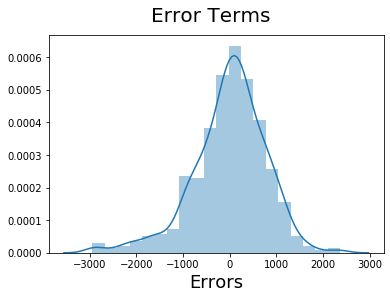

In [110]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Residual error is normalised and centred at 0, the assumptions of linear regression holds good.

# <span style="color:#0099cc"> Making Predictions

As the trained data set is scaled, the coefficients we got are for scaled data set, so if we don't scale the test data set it will be wrong.Applying the scaling on the test set


Here `transform` is used not `fit_transform` , as `fit_transform` will learn on the data set and then transform. Test data set should always be performed on unseen data, Hence only `scaler.transform` is used.

In [111]:
num_vars = ['temp','hum','windspeed']

# fit_transform is used to learn the min-max in the data set and then transform
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [112]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.515982,0.031963,0.680365,0.535622,0.652989,0.427136,4430.292237,0.246575,0.278539,0.228311,...,0.091324,0.091324,0.159817,0.118721,0.168950,0.100457,0.173516,0.164384,0.031963,0.388128
std,0.500889,0.176306,0.467403,0.229910,0.154028,0.177749,1975.455543,0.432005,0.449307,0.420705,...,0.288730,0.288730,0.367276,0.324202,0.375566,0.301297,0.379560,0.371472,0.176306,0.488440
min,0.000000,0.000000,0.000000,0.046591,0.193231,0.054910,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339593,0.522019,0.296727,3221.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.556613,0.668809,0.405045,4553.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.762425,0.516292,5840.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.965734,0.997858,1.157215,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the output we can infer that the maximum value is not 1 for all the variables. This confirms that the data is scaled using `fit_transform`.

### Dividing into X_test and y_test

In [113]:
y_test = df_test.pop('cnt')
X_test = df_test


In [114]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test)

In [115]:
X_test_final.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
580,1.0,1,0,0,0.914852,0.630677,0.560788,0,0,0,...,0,0,0,0,1,0,0,0,0,0
199,1.0,0,0,1,0.894086,0.668809,0.258148,0,0,0,...,0,0,0,0,0,1,0,0,0,0
725,1.0,1,0,1,0.243025,0.671380,0.781879,1,0,0,...,0,0,0,0,0,0,0,0,0,1
144,1.0,0,0,1,0.749751,0.715938,0.314528,0,1,0,...,0,0,0,0,0,0,0,0,0,0
477,1.0,1,0,1,0.327133,0.788347,0.670619,0,1,0,...,0,0,0,0,0,0,1,0,0,1


- As We have dropped the many variables from the trained data set,thus we will not be having co-efficients for those variables.so we will get an error if we don't drop those variables. Hence we need to drop those variables from the test data set. 
- Here instead of dropping those variables, selecting the variables which are in the final trained model set along with the constant of test data set would be better as we need to drop many columns.

In [116]:
X_test_final = X_test_final[['const','windspeed','temp','yr','season_spring','weathersit_Mist',
                             'season_winter','weathersit_Light Snow','holiday']]

In [117]:
X_test_final.head()

,const,windspeed,temp,yr,season_spring,weathersit_Mist,season_winter,weathersit_Light Snow,holiday
580,1.0,0.560788,0.914852,1,0,0,0,0,0
199,1.0,0.258148,0.894086,0,0,0,0,0,0
725,1.0,0.781879,0.243025,1,1,1,0,0,0
144,1.0,0.314528,0.749751,0,0,0,0,0,0
477,1.0,0.670619,0.327133,1,0,1,0,0,0


In [118]:
# Making predictions using the X_test_final

y_pred_test = lm_final.predict(X_test_final)

In [119]:
from sklearn.metrics import r2_score

In [120]:
r2_score(y_true=y_test, y_pred=y_pred_test)

0.08078011927025697

# <span style="color:#0099cc"> Model Evaluation

Let's now plot the graph for actual versus predicted values.

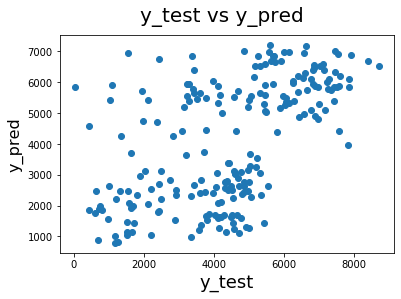

In [121]:
# Plotting y_test and y_pred_test to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
# Plot heading
fig.suptitle('y_test vs y_pred', fontsize = 20)  
# X-label
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)    
plt.show()

In [122]:
heatmapDF = X_test_final.iloc[:,1:]

In [123]:
heatmapDF = pd.concat([heatmapDF, y_test], axis = 1)

In [124]:
heatmapDF.head()

,windspeed,temp,yr,season_spring,weathersit_Mist,season_winter,weathersit_Light Snow,holiday,cnt
580,0.560788,0.914852,1,0,0,0,0,0,6824
199,0.258148,0.894086,0,0,0,0,0,0,4541
725,0.781879,0.243025,1,1,1,0,0,0,2114
144,0.314528,0.749751,0,0,0,0,0,0,4978
477,0.670619,0.327133,1,0,1,0,0,0,3214


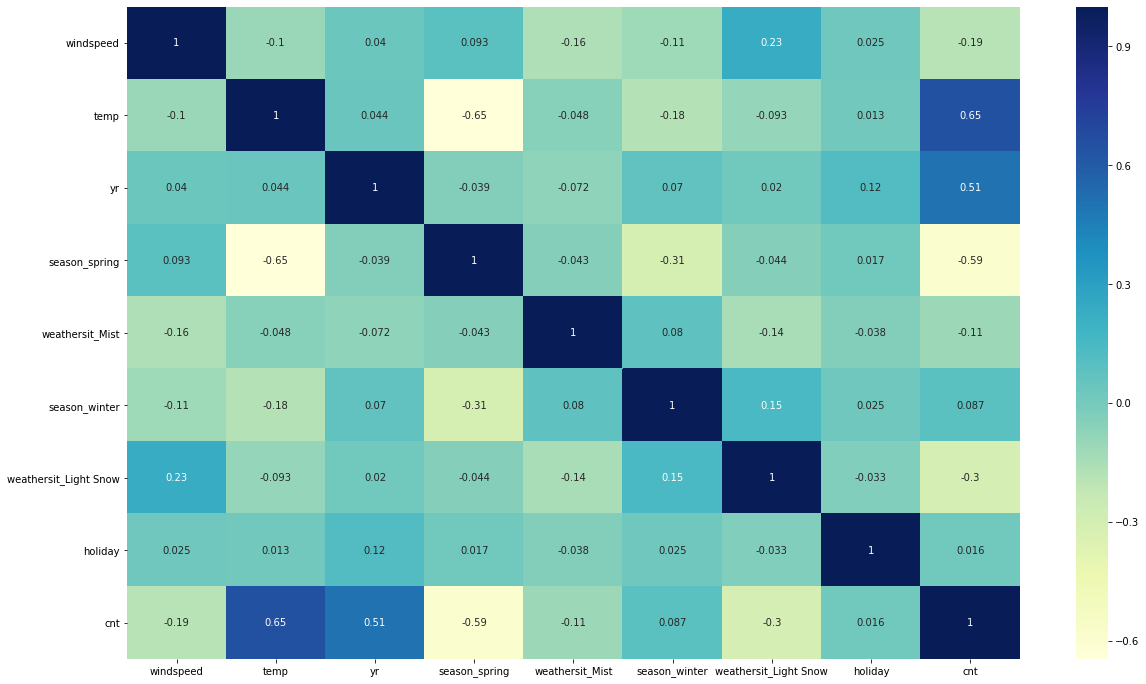

In [125]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(heatmapDF.corr(), annot=True,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


From the heatmap, the equation of our best fitted line is:

$ cnt = -0.19  \times  windspeed + 0.65  \times  temp + 0.51 \times yr - 0.59 \times season spring - 0.11 \times weathersit_Mist + 0.087 \times season_winter - 0.3 \times weathersit_Light + 0.016 \times holiday $
